In [1]:
# Common Import
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
              
# To plot pretty figures with Plotly
import plotly.express as px
import plotly.graph_objects as go

In [2]:
recent_grads = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv')
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [43]:
major_processed = recent_grads
major_processed['Major'] = major_processed['Major'].str.title()
major_processed = major_processed.sort_values(['Median'], ascending=False)
major_processed 

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,Petroleum Engineering,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,Mining And Mineral Engineering,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,Metallurgical Engineering,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,Naval Architecture And Marine Engineering,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,Chemical Engineering,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,Zoology,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,Educational Psychology,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,Clinical Psychology,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,Counseling Psychology,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [44]:
# Aggregating by Category

by_major_category = major_processed
by_major_category = by_major_category[~by_major_category['Total'].isnull()]

by_major_category['Median_mul_sample'] = by_major_category['Median'] * by_major_category['Sample_size']

by_major_category = by_major_category.groupby('Major_category').agg(Men=('Men','sum'), 
                                                                    Women=('Women','sum'),
                                                                    Total=('Total','sum'),
                                                                    Median_mul_sample =  ('Median_mul_sample','sum' ),
                                                                    Sample_size = ('Sample_size' , 'sum'))

by_major_category['MedianSalary'] = by_major_category['Median_mul_sample'] / by_major_category['Sample_size']

by_major_category['ShareWomen'] = by_major_category['Women'] / by_major_category['Total']
by_major_category = by_major_category.reset_index()
by_major_category = by_major_category.sort_values('ShareWomen', ascending=False)
by_major_category

<ipython-input-44-53ca3457bf46>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Major_category,Men,Women,Total,Median_mul_sample,Sample_size,MedianSalary,ShareWomen
8,Health,75517.0,387713.0,463230.0,171017300,3914,43693.740419,0.836977
6,Education,103526.0,455603.0,559129.0,153467800,4742,32363.517503,0.814844
14,Psychology & Social Work,98115.0,382892.0,481007.0,99325400,3180,31234.402516,0.796022
11,Interdisciplinary,2817.0,9479.0,12296.0,4480000,128,35000.000000,0.770901
4,Communications & Journalism,131921.0,260680.0,392601.0,156600000,4508,34738.243123,0.663982
1,Arts,134390.0,222740.0,357130.0,104469500,3260,32045.858896,0.623694
9,Humanities & Liberal Arts,272846.0,440622.0,713468.0,171907000,5340,32192.322097,0.617578
2,Biology & Life Science,184919.0,268943.0,453862.0,79655100,2317,34378.549849,0.592566
10,Industrial Arts & Consumer Services,103781.0,126011.0,229792.0,74011800,2165,34185.588915,0.548370
15,Social Science,256834.0,273132.0,529966.0,179576900,4581,39200.371098,0.515376


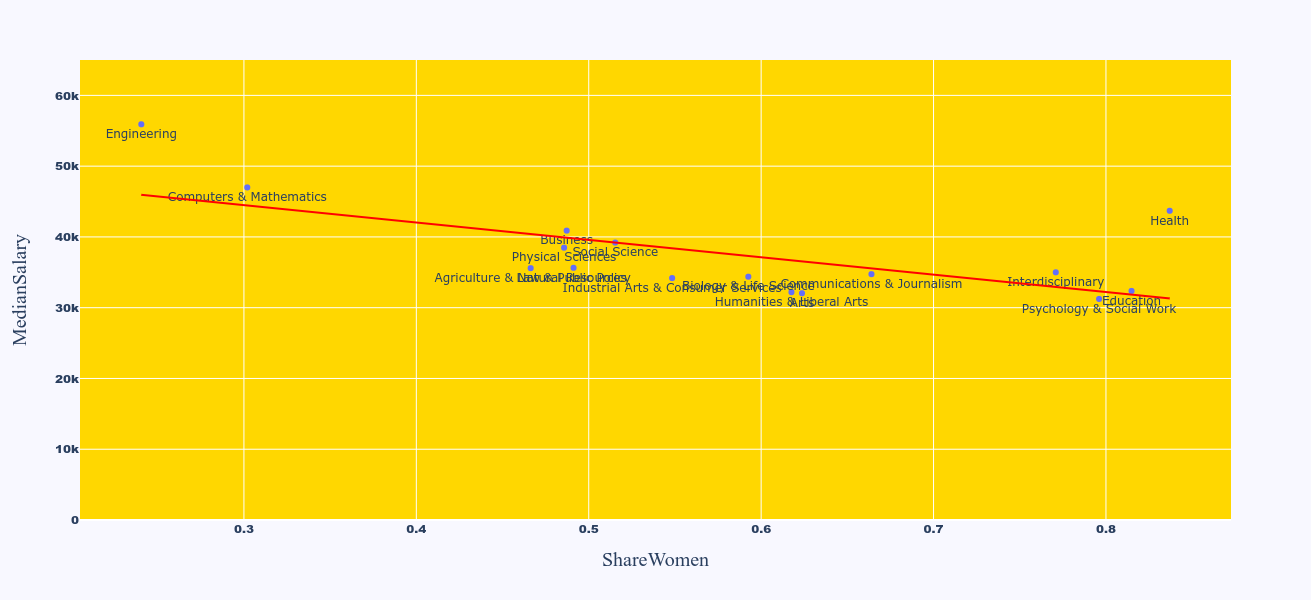

In [69]:
fig = px.scatter(by_major_category, x='ShareWomen', y='MedianSalary', 
                 text='Major_category', height=600 , trendline='ols',
                trendline_color_override="red")

fig.update_traces(textposition='bottom center')

fig.update_yaxes(
    range=[0, 65000]  # sets the range of yaxis
    
)
#Update axes
fig.update_xaxes(title_font = dict(size=20,family='Time NEw Roman'))
fig.update_xaxes(tickfont_family="Arial Black")

fig.update_yaxes(title_font=dict(size=20, family='Times New Roman'))
fig.update_yaxes(tickfont_family="Arial Black")

fig.update_layout({
                    'plot_bgcolor':'gold',
                    'paper_bgcolor':'ghostwhite'})
fig.show()





### What categories of majors makes more money than others?

In [5]:
major_processed  = major_processed.sort_values(['Median'], ascending=False)
major_processed

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
4,5,2405,Chemical Engineering,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
9,10,2408,Electrical Engineering,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,55450,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170
8,9,2414,Mechanical Engineering,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,71298,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
11,12,2401,Aerospace Engineering,15058.0,12953.0,2105.0,Engineering,0.139793,147,11391,11106,2724,8790,794,0.065162,60000,42000,70000,8184,2425,372
10,11,2407,Computer Engineering,41542.0,33258.0,8284.0,Engineering,0.199413,399,32506,30315,5146,23621,2275,0.065409,60000,45000,75000,23694,5721,980
16,17,2412,Industrial And Manufacturing Engineering,18968.0,12453.0,6515.0,Engineering,0.343473,183,15604,14879,2243,11326,699,0.042876,57000,37900,67000,8306,3235,640
17,18,2400,General Engineering,61152.0,45683.0,15469.0,Engineering,0.252960,425,44931,41235,7199,33540,2859,0.059824,56000,36000,69000,26898,11734,3192
20,21,2102,Computer Science,128319.0,99743.0,28576.0,Computers & Mathematics,0.222695,1196,102087,91485,18726,70932,6884,0.063173,53000,39000,70000,68622,25667,5144
24,25,6212,Management Information Systems And Statistics,18713.0,13496.0,5217.0,Business,0.278790,278,16413,15141,2420,13017,1015,0.058240,51000,38000,60000,6342,5741,708
27,28,6204,Operations Logistics And E-Commerce,11732.0,7921.0,3811.0,Business,0.324838,156,10027,9639,1183,7724,504,0.047859,50000,40000,60000,1466,3629,285


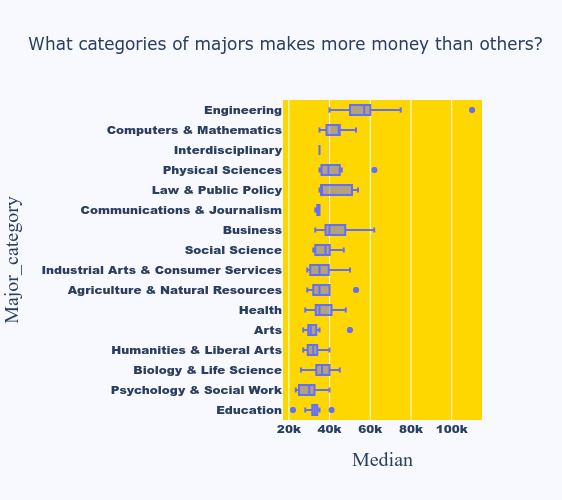

In [104]:
fig = px.box(major_processed, x='Median',
             y='Major_category',
             title="What categories of majors makes more money than others?",
             width=800, height=500)
# Update axes
fig.update_xaxes(title_font = dict(size=20,family='Time NEw Roman'))
fig.update_xaxes(tickfont_family="Arial Black")

fig.update_yaxes(title_font=dict(size=20, family='Times New Roman'))
fig.update_yaxes(tickfont_family="Arial Black")

fig.update_layout({
                    'plot_bgcolor':'gold',
                    'paper_bgcolor':'ghostwhite'})
fig.show()

### What are the highest earning majors?

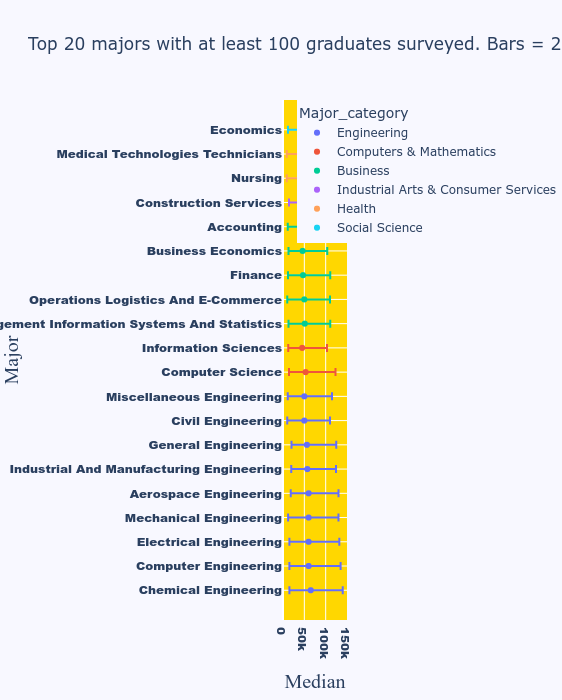

In [47]:
major_processed = major_processed[major_processed['Sample_size']>=100]
major_processed = major_processed.head(20)
fig = px.scatter(major_processed, x='Median', y='Major',
                color='Major_category',width=800, height=700,
                 error_x_minus="P25th", error_x="P75th",
                 title="Top 20 majors with at least 100 graduates surveyed. Bars = 25th to 75th percentile."
                )

fig.update_xaxes(
    range=[0, 150000]  # sets the range of xaxis
    
)
# Update axes
fig.update_xaxes(title_font = dict(size=20,family='Time NEw Roman'))
fig.update_xaxes(tickfont_family="Arial Black")

fig.update_yaxes(title_font=dict(size=20, family='Times New Roman'))
fig.update_yaxes(tickfont_family="Arial Black")

fig.update_layout({
                    'plot_bgcolor':'gold',
                    'paper_bgcolor':'ghostwhite'})
fig.show()

### How does gender breakdown relate to typical earnings

In [36]:
# http://connor-johnson.com/2014/08/28/tidyr-and-pandas-gather-and-melt/
def gather(df ,key, value, cols):
    id_vars = [col for col in df.columns if col not in cols]
    id_values = cols
    var_name = key
    value_name  = value
    return pd.melt(df, id_vars, id_values, var_name, value_name)

major_processed = major_processed.sort_values('Total', ascending=False)
major_processed = major_processed.head(20)
major_processed = major_processed.sort_values('Total', ascending=True)
major_processed = gather(major_processed, 'Gender', 'Number', [ 'Women','Men']) 

major_processed

,Rank,Major_code,Major,Total,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Gender,Number
0,96,6004,Commercial Art And Graphic Design,103480.0,Arts,0.690365,1186,83483,67448,24387,52243,8947,0.096798,35000,25000,45000,37389,38119,14839,Women,71439.0
1,125,5507,Sociology,115433.0,Social Science,0.718365,1024,92721,73475,29639,56561,8608,0.084951,33000,25000,44000,29051,48899,13748,Women,82923.0
2,140,4101,Physical Fitness Parks Recreation And Leisure,125074.0,Industrial Arts & Consumer Services,0.502846,1014,103078,77428,38515,57978,5593,0.051467,32000,24000,43000,27581,63946,16838,Women,62893.0
3,21,2102,Computer Science,128319.0,Computers & Mathematics,0.222695,1196,102087,91485,18726,70932,6884,0.063173,53000,39000,70000,68622,25667,5144,Women,28576.0
4,37,5501,Economics,139247.0,Social Science,0.355469,1322,104117,96567,25325,70740,11452,0.099092,47000,35000,65000,25582,37057,10653,Women,49498.0
5,115,6402,History,141951.0,Humanities & Liberal Arts,0.448732,1058,105646,84681,40657,59218,11176,0.095667,34000,25000,47000,35336,54569,16839,Women,63698.0
6,114,2300,General Education,143718.0,Education,0.812877,919,118241,98408,29558,73531,7195,0.057360,34000,26000,41000,82007,31112,11443,Women,116825.0
7,95,5301,Criminal Justice And Fire Protection,152824.0,Law & Public Policy,0.475010,1728,125393,109970,32242,88548,11268,0.082452,35000,26000,45000,24348,88858,18404,Women,72593.0
8,139,2304,Elementary Education,170862.0,Education,0.923745,1629,149339,123177,37965,86540,7297,0.046586,32000,23400,38000,108085,36972,11502,Women,157833.0
9,36,6207,Finance,174506.0,Business,0.340825,2189,145696,137921,21463,108595,9413,0.060686,47000,35000,64000,24243,48447,9910,Women,59476.0


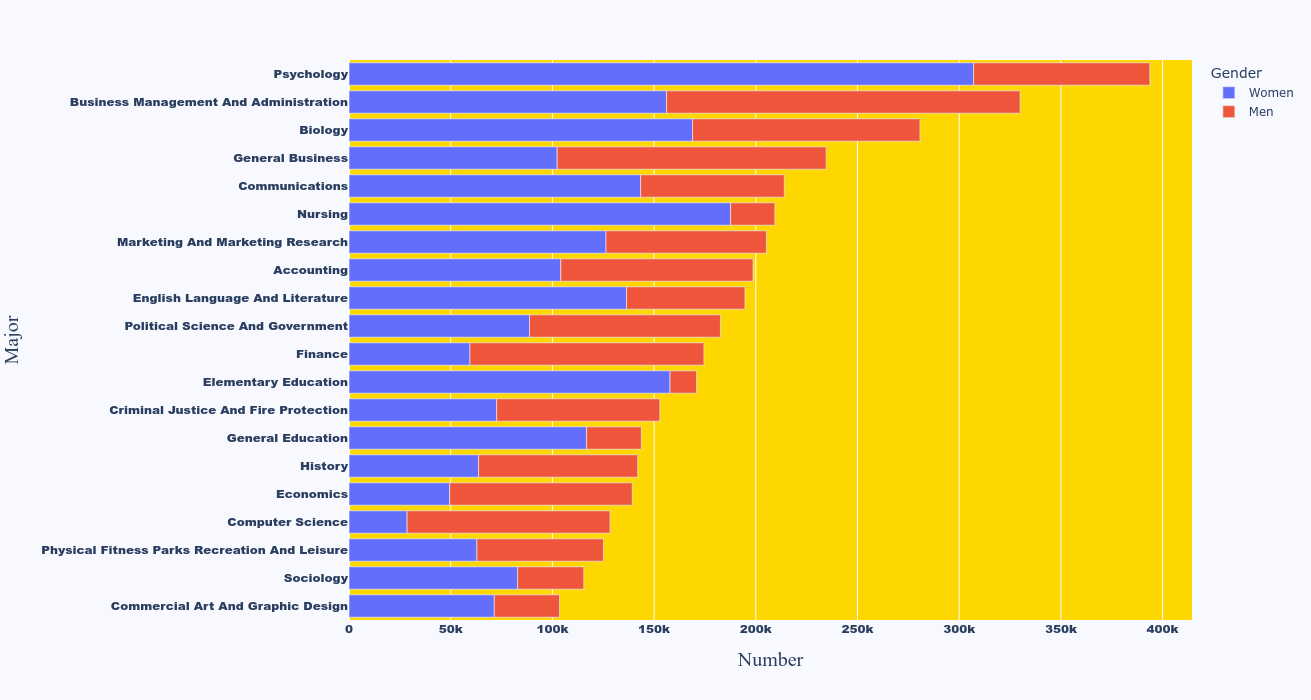

In [41]:
# Create stack bar chart using plotly

fig = px.bar(major_processed, x='Number', y='Major' , color='Gender',
             width=800, height=700
            )
# Update axes
fig.update_xaxes(title_font = dict(size=20,family='Time NEw Roman'))
fig.update_xaxes(tickfont_family="Arial Black")

fig.update_yaxes(title_font=dict(size=20, family='Times New Roman'))
fig.update_yaxes(tickfont_family="Arial Black")

fig.update_layout({
                    'plot_bgcolor':'gold',
                    'paper_bgcolor':'ghostwhite'})

fig.show()

[Gather() Function in Python](http://connor-johnson.com/2014/08/28/tidyr-and-pandas-gather-and-melt/)